<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao-a-sistemas-de-recomendacao-com-python/blob/master/dist%C3%A2ncia_euclidiana_entre_usu%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4º Usuarios similares - User Based
tanto que gostaram quanto nao gostaram de filmes, calcular a distancia Euclidiana

In [2]:
#quando tenho um unica reta, ou uma dimencao, ou comparando apenas um filme
#o joao deu nota 3 matrix e maria deu 4 e jose deu 2
joao = [3]
maria = [4]
jose = [2]
#a ditancia é um menos o outro
print('entre maria e joao ', maria[0] - joao[0])
print('entre jose e maria', jose[0] - maria[0])
print('entre joao e jose ', joao[0] - jose[0])

entre maria e joao  1
entre jose e maria -2
entre joao e jose  1


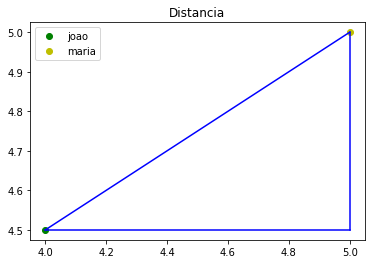

In [3]:
#agora falando mais de um filme ou mais de uma dimenção ou valor
# qual a distancia deles
joao = [4, 4.5]
maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4,4.5, "go")
plt.plot(5,5, "yo")
plt.legend(["joao", "maria"])
plt.title("Distancia")

#coloca linha
plt.plot([4,5], [4.5, 4.5], color='b', linestyle="-")
plt.plot([4,5], [4.5, 5], color='b', linestyle="-")
plt.plot([5,5], [4.5, 5], color='b', linestyle="-")

In [4]:
#por padrao nao suporta conta no array
import numpy as np
joao = np.array([4,4.5])
maria = np.array([5,5])
joao-maria

array([-1. , -0.5])

In [0]:
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  quadrado_delta_x = delta_x * delta_x
  quadrado_delta_y = delta_y * delta_y
  hipotenusa = sqrt(quadrado_delta_x + quadrado_delta_y)
  return hipotenusa

In [6]:
# a distancia entre os dois
pitagoras(joao,maria)

1.118033988749895

In [7]:
#no numpy ja tem essa formula
np.linalg.norm(joao - maria)

1.118033988749895

In [0]:
def distancia_vetor(a, b):
  return np.linalg.norm(a - b)

In [9]:
#quem é mais parecido de jose, compara esse usuario com todos
jose = np.array([3.5,4.5])
print(distancia_vetor(jose, maria))
print(distancia_vetor(jose, joao))

1.5811388300841898
0.5


#Primeiro extrair as notas, ditancia dos usuario do dataset

In [0]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
notas = pd.read_csv('ratings.csv')

filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [11]:
#filtar um usuario, pegar duas coluna, colocar com indice
notas_usuario = notas.query('usuarioId==1')
notas_usuario = notas_usuario[['filmeId', 'nota']].set_index("filmeId")
notas_usuario

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [0]:
def notas_usuario(usuarioId):
    notas_usuario = notas.query('usuarioId==%d' % usuarioId)
    notas_usuario = notas_usuario[['filmeId', 'nota']].set_index("filmeId")
    return notas_usuario

In [13]:
u1 = notas_usuario(1)
u4 = notas_usuario(4)
print(u1.head())
print(u4.head())

         nota
filmeId      
1         4.0
3         4.0
6         4.0
47        5.0
50        5.0
         nota
filmeId      
21        3.0
32        2.0
45        3.0
47        2.0
52        3.0


In [14]:
#junta as lista pelo indice para comparar, mudar os nomes das coluna para nao dar over lap, e remover o NDA deixa apenas os filmes que os dois viram
distancias = u1.join(u4, lsuffix="u_esq", rsuffix="u_dir").dropna()
distancias.head()

,notau_esq,notau_dir
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0


In [19]:
#calcular a distancia do vetor
distancia_vetor(distancias['notau_esq'], distancias['notau_dir'])

11.135528725660043

In [0]:
#agora simplificar em funcao para fazer de maneira mais simples
def distancia_usuarios(uId1,uId2):
  u1N = notas_usuario(uId1)
  u2N = notas_usuario(uId2)
  distancias = u1N.join(u2N, lsuffix="u_esq", rsuffix="u_dir").dropna()
  distancia_usu1_usu2 = distancia_vetor(distancias['notau_esq'], distancias['notau_dir'])
  return [uId1, uId2, distancia_usu1_usu2]

In [21]:
distancia_usuarios(1,4)

[1, 4, 11.135528725660043]

O sistema compara com todos os usuarios

In [22]:
quantidade_usuarios = len(notas['usuarioId'].unique())
quantidade_usuarios

610

In [23]:
#um loop para percorar todos os usuario comparado com um cara

vc = 1

todas_distancias = []

for usuario_id in notas['usuarioId'].unique():
  #print(usuario_id)
  info = distancia_usuarios(vc,usuario_id)
  #print(info)
  todas_distancias.append(info)

todas_distancias[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [24]:
#criando uma lista
def ditancia_todos(vc):
  todas_distancias = []
  for usuario_id in notas['usuarioId'].unique():
    info = distancia_usuarios(vc,usuario_id)
    todas_distancias.append(info)
  return todas_distancias

ditancia_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [25]:
#ou para simplificar criando uma lista
def ditancia_todos(vc):
  return [distancia_usuarios(vc,usuario_id) for usuario_id in notas['usuarioId'].unique()]

ditancia_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [43]:
#criando dataframe
def distancia_todos(vc):
  distancias = [distancia_usuarios(vc,usuario_id) for usuario_id in notas['usuarioId'].unique()]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outro", "distancia"])
  return distancias
ditancia_usu1_todos = distancia_todos(1)
ditancia_usu1_todos.head()

,voce,outro,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


#usuarios com nada em comum são colocado distante
distancia entre um ponto e ele mesmo é zero, tbm a distancia entra pessoas que nao assistiram nada tbm zero pq eles nao tem nada em comum.

assim podemos ter um minimo de filme em comum.

In [36]:
ditancia_usu1_todos.sort_values(by=['distancia'])

,voce,outro,distancia
0,1,1,0.000000
396,1,397,0.000000
495,1,496,0.000000
305,1,306,0.000000
290,1,291,0.000000
...,...,...,...
473,1,474,18.594354
159,1,160,18.794946
216,1,217,19.646883
598,1,599,19.665960


In [48]:
#usuario que nao tem nada em comum
notas_usuario(1).join(notas_usuario(397), lsuffix="u_esq", rsuffix="u_dir").dropna()

,notau_esq,notau_dir
filmeId,,
260,5.0,5.0
1196,5.0,5.0
1198,5.0,5.0
1210,5.0,5.0
2571,5.0,5.0
3578,5.0,5.0


In [0]:
#agora usuario que nao tem nada em comum e coloca uma distancia grande
def distancia_usuarios(uId1,uId2, minimo=5):
  u1N = notas_usuario(uId1)
  u2N = notas_usuario(uId2)
  diferencas = u1N.join(u2N, lsuffix="u_esq", rsuffix="u_dir").dropna()
  
  #se a pessoa so viu 5 filmes em comum
  if(len(diferencas) < minimo):
    return [uId1, uId2, 100000]

  distancia_usu1_usu2 = distancia_vetor(diferencas['notau_esq'], diferencas['notau_dir'])
  return [uId1, uId2, distancia_usu1_usu2]

In [40]:
ditancia_todos(1).head()

,voce,outro,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [49]:
def mais_proxima(voce_id):
  distancias = distancia_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias.set_index("outro")
  distancias.drop(voce_id)
  return distancias

mais_proxima(1)

,voce,outro,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
...,...,...,...
189,1,190,100000.000000
59,1,60,100000.000000
575,1,576,100000.000000
544,1,545,100000.000000
